# AirBnb Amsterdam Listings

## Imports

In [1]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import pandas as pd
import numpy as np

from scipy import stats 

from sklearn.cluster import KMeans, Birch, MiniBatchKMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture  
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib as mtl
import altair as alt
import seaborn as sns

from ipywidgets import interact  

import ipywidgets as widgets

# pd.set_option('display.max_columns', None)
alt.data_transformers.disable_max_rows()
pd.set_option("display.max_rows", None, "display.max_columns", None)

# figure sizes
standard_fig_size = (21,6)
boxplot_fig_size = (15,3)
heatmap_fig_size = (24,12)
countplot_fig_size = (15,6)

### About the dataset

What is the dataset about?
* The dataset is about detailed Airbnb Listings in Amsterdam.

* The dataset is from the activist project Inside Airbnb. The data they provide is publicly available data from Airbnb, it can be found at http://insideairbnb.com/get-the-data.html

### Loading Data

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. Here we have some above over 5400 number of listings in the city of Amsterdam that generate a lot of data — data that can be analyzed.

Data feature explanation: https://docs.google.com/spreadsheets/d/2iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896

In [2]:
#use a standard dataset of heterogenous data
listings = pd.read_csv('data/listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20211104024252,2021-11-04,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36435,4.94358,Private room in rental unit,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Refrigerator"", ""Paid parking off premises"", ...",$59.00,3,28,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,18,33,33,33,2021-11-04,282,4,2,2013-08-25,2019-11-21,4.89,4.93,5.00,4.98,4.98,4.68,4.81,0363 5F3A 5684 6750 D14D,t,1,0,1,0,2.83
1,20168,https://www.airbnb.com/rooms/20168,20211104024252,2021-11-04,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",+ (Phone number hidden by Airbnb),within a few hours,100%,100%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36407,4.89393,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""TV"", ""Wifi"", ""Bed linens"", ""Refrigerator"", ""...",$106.00,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,0,0,0,2021-11-04,339,0,0,2014-01-17,2020-03-27,4.44,4.69,4.79,4.63,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,3.57
2,27886,https://www.airbnb.com/rooms/27886,20211104024252,2021-11-04,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,Flip,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands","Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/97647/profile...,https://a0.muscache.com/im/users/97647/profile...,Westelijke Eilanden,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, N

## Data cleanup

Dropping superflous features.

In [3]:
# List of the features that are not important for us.
misc_features = [
    'listing_url',
    'scrape_id',
    'name',
    'description',
    'neighborhood_overview',
    'picture_url',
    'host_url',
    'host_location',
    'host_about',
    'host_thumbnail_url',
    'host_picture_url',
    'neighbourhood',
    'neighbourhood_group_cleansed',
    # 'latitude',
    # 'longitude',
    'calendar_updated',
    'calendar_last_scraped',
    'license'
]

# dropping the columns from df
listings = listings.drop(misc_features, axis=1)

### Data adjustments

For example the list of 'host_verification' options is not that important, what is important is how many different options the host provides/requires for verification.


In [4]:
import re
regex = re.compile('[a-z A-Z]')

# doing some float adjustemnts
listings['bathrooms'] = listings['bathrooms_text'].fillna('NaN').str.replace(regex, r"\0", regex=True).str.strip('\x00 -').astype('string').replace('', 'NaN').astype('float64')
listings['host_verifications'] = listings['host_verifications'].map(lambda x: len([_x.strip() for _x in eval(x) ]))
listings['amenities'] = listings['amenities'].map(lambda x: len([_x.strip() for _x in eval(x)])) 
listings['price'] = listings['price'].astype('string').str.strip('$').str.replace(',', '').astype('float64')
listings['host_response_rate'] = listings['host_response_rate'].str.replace('%', '').astype('float64')
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.replace('%', '').astype('float64')

# doing some data adjustments
# --> use dataype 'timedelta' to have the datatype as a reference between two datetimes
listings['last_scraped'] = listings['last_scraped'].astype('datetime64')
listings['host_since'] = listings['host_since'].astype('datetime64')
listings['first_review'] = listings['first_review'].astype('datetime64')
listings['last_review'] = listings['last_review'].astype('datetime64')

neighbourhood_district = {
    'Centre District': ['Centrum-Oost', 'Centrum-West'],
    'Nieuw-West District': ['Geuzenveld - Slotermeer', 'Slotervaart', 'De Aker - Nieuw Sloten', 'Osdorp'],
    'Noord District': ['Noord-Oost', 'Noord-West', 'Oud-Noord'],
    'Oost District': ['Oostelijk Havengebied - Indische Buurt', 'IJburg - Zeeburgereiland', 'Oud-Oost', 'Watergraafsmeer'],
    'West District': ['De Baarsjes - Oud-West', 'Westerpark', 'Bos en Lommer'],
    'Zuid District': ['Buitenveldert - Zuidas', 'De Pijp - Rivierenbuurt', 'Zuid'],
    'Zuidoost District': ['Bijlmer-Centrum', 'Gaasperdam - Driemond', 'Bijlmer-Oost']
}

d = {k: oldk for oldk, oldv in neighbourhood_district.items() for k in oldv}

listings['neighbourhood_district'] = listings['neighbourhood_cleansed'].map(d)
# drops
listings = listings.drop('bathrooms_text', axis=1)

In [5]:
listings.tail()

,id,last_scraped,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,neighbourhood_district
5397,53121415,2021-11-04,303405414,Jm,2019-10-20,within a few hours,80.0,100.0,f,De Wallen,0.0,0.0,6,t,t,Centrum-West,52.373872,4.900818,Room in aparthotel,Entire home/apt,6,1.5,2.0,6.0,47,251.0,1,365,1.0,3.0,365.0,365.0,2.1,365.0,t,0,0,26,295,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,5,5,0,0,NaN,Centre District
5398,53124758,2021-11-04,300888539,WanderlustSolutionbooking,2019-10-08,within an hour,98.0,81.0,f,Amsterdam Centrum,11.0,11.0,7,t,t,Centrum-West,52.372290,4.891089,Entire serviced apartment,Entire home/apt,3,0.0,NaN,NaN,13,215.0,2,365,2.0,2.0,365.0,365.0,2.0,365.0,t,7,7,7,7,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,7,4,3,0,NaN,Centre District
5399,53127475,2021-11-04,6606794,Bart,2013-05-27,NaN,NaN,NaN,f,NaN,0.0,0.0,4,t,t,Westerpark,52.388880,4.880210,Entire condominium (condo),Entire home/apt,2,1.0,1.0,NaN,25,140.0,3,21,3.0,3.0,21.0,21.0,3.0,21.0,t,14,38,39,314,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN,West District
5400,53131052,2021-11-04,430112294,Bao,2021-11-02,NaN,NaN,NaN,f,NaN,0.0,0.0,1,t,f,Bijlmer-Centrum,52.315201,4.954658,Entire condominium (condo),Entire home/apt,2,1.0,1.0,1.0,7,176.0,1,365,1.0,1.0,365.0,365.0,1.0,365.0,t,30,60,90,365,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN,Zuidoost District
5401,53140075,2021-11-04,303405414,Jm,2019-10-20,within a few hours,80.0,100.0,f,De Wallen,0.0,0.0,6,t,t,Centrum-West,52.374160,4.899464,Room in aparthotel,Entire home/apt,5,1.5,2.0,5.0,46,317.0,1,365,1.0,3.0,1125.0,1125.0,2.1,1125.0,t,1,1,27,298,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,5,5,0,0,NaN,Centre District


### Deeper look into missing data

In [6]:
# figure setup fro following figures
sns.set(rc={'figure.figsize':heatmap_fig_size})

To get a deeper understanding of data gathering and the issues that come with missing data, a heatmap displaying null/NaN values is very powerful to find them fast and maybe eliminate some of the features, not only for data visualization and interpretation but also for the possible future training of an agent on the data.

<AxesSubplot:>

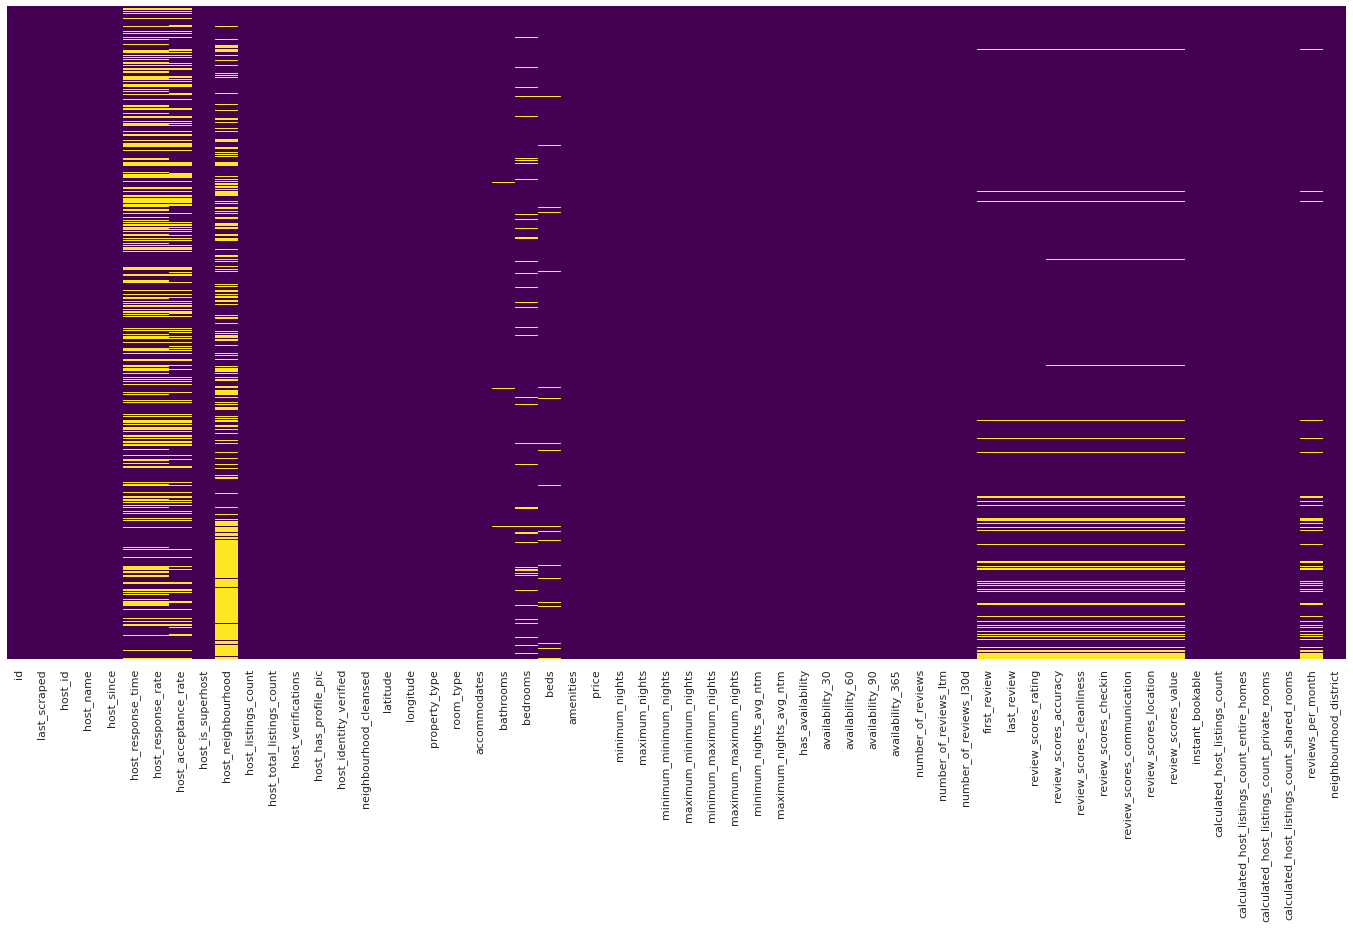

In [7]:
sns.heatmap(listings.isnull(), yticklabels=False, cbar=False, cmap='viridis')

What already seems striking is that the lower data entries (i suspect newer, more recently created, ones, which sounds intuitive, but we'll have at look at that later) more often don't seem to have any entries in the regarding review features: 
* *features first_review* 
* *last_review* 
* *review_scores_rating* 
* *review_scores_accuracy* 
* *review_scores_cleanliness* 
* *review_scores_checking*
* *review_scores_communication* 
* *review_scores_location* 
* *review_scores_value* 
* *reviews_per_month*.

*As already said we must have a look into this funny and peculiar observation later on.*

To do some artificial data filling here would probably obscure the data to much, because about $\frac{1}{4}$ of the entries are effected, so it would be more reasonable to look at why they are effected, then making (!) them whole.

One can also observe that the bathrooms, bedrooms and beds feature (all discrete/categorical variables) have sparse null values in them, we can now just fill these null values with the mean value
in order to have a full dataset where no entries have to be dropped. For features like host_neighborhood where there are alot on null values we can consider dropping the feature, but 
due to the fact that we are not training an ML agent it is not that important to have a very clean dataset. Maybe we can find something interesiting regarding missing host_neighborhood values!

In [8]:
listings['bathrooms'] = listings['bathrooms'].fillna(round(listings['bathrooms'].mean())) # interger or half
listings['bedrooms'] = listings['bedrooms'].fillna(round(listings['bedrooms'].mean())) # integer
listings['beds'] = listings['beds'].fillna(round(listings['beds'].mean())) # integer

One more look on the clean data to see if we missed something.

<AxesSubplot:>

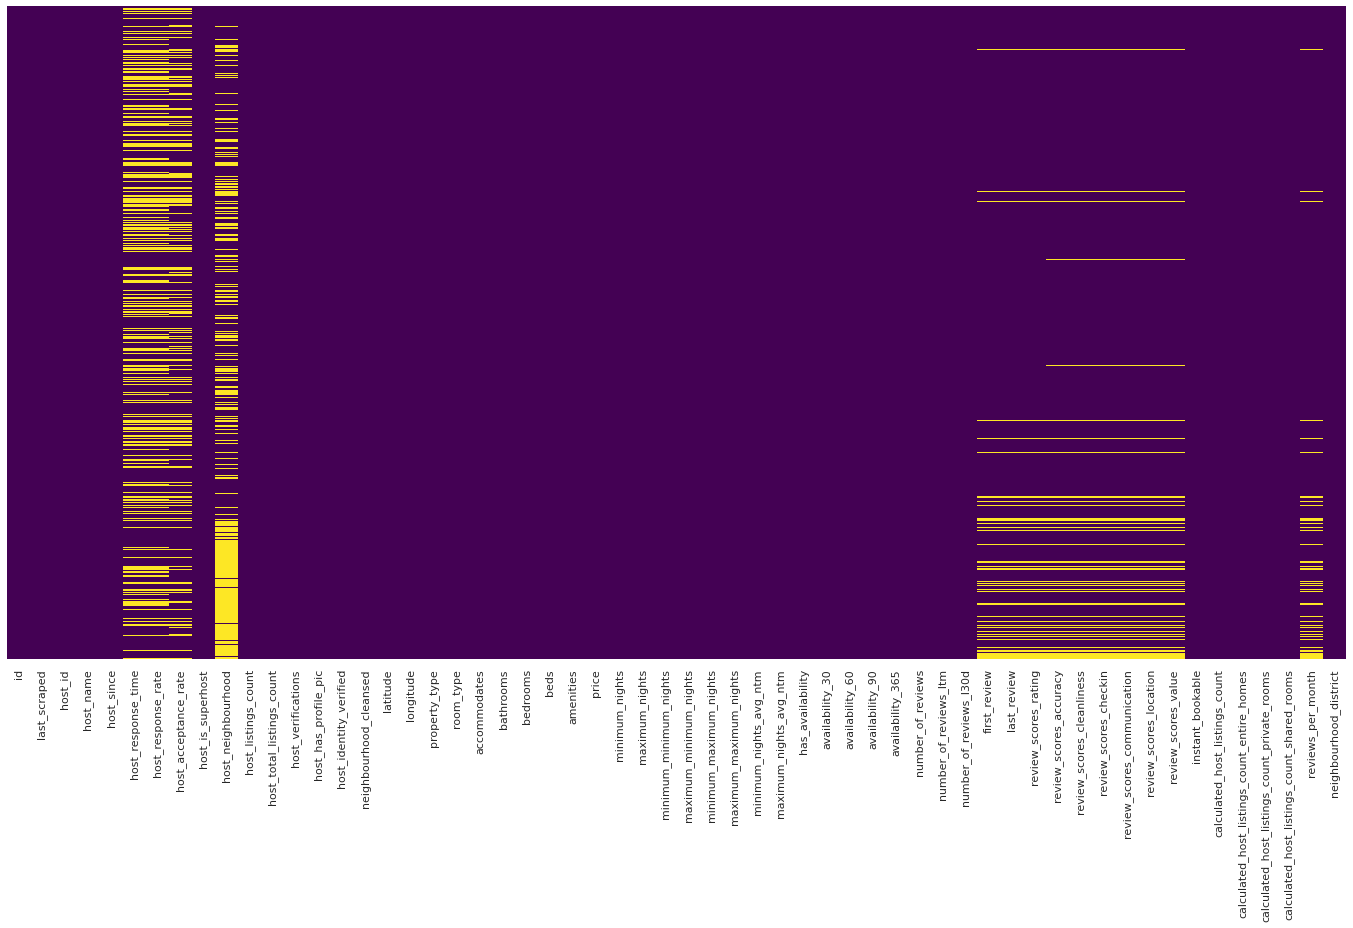

In [9]:
sns.heatmap(listings.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Descriptive Statistics on individual Attributes

In [10]:
# figure setup for following figures
sns.set(rc={'figure.figsize':boxplot_fig_size})

### Price Feature

Here we will have a look at the *price* feature which is a continous feature.

Starting with a boxplot of the price to get a grip of the summary statistics of the price attribute, the mean is marked as a white dot.

<AxesSubplot:xlabel='price'>

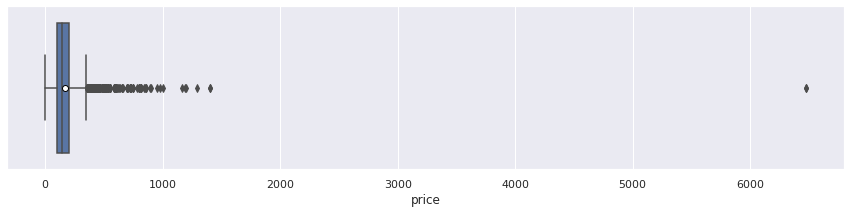

In [11]:
sns.boxplot(
    listings['price'], 
    showmeans=True,
    meanprops={
        "marker":"o",
        "markerfacecolor":"white", 
        "markeredgecolor":"black",
        "markersize":"6"
    }
)

We see that there is one outlier that is siginificantly bigger then the rest, so our mean is affected by this to a certain extent that we will investigate later.

In [12]:
# this has to be the biggest outlier
print(f"Biggest Outlier: {listings['price'].max()}")

Biggest Outlier: 6477.0


Inorder to get a better look at the boxplot, we  plot it without the outliers.

<AxesSubplot:xlabel='price'>

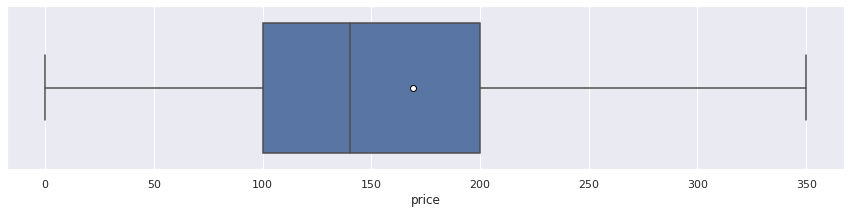

In [13]:
sns.boxplot(
    listings['price'],
    showfliers=False,
    showmeans=True,
    meanprops={
        "marker":"o",
        "markerfacecolor":"white", 
        "markeredgecolor":"black",
        "markersize":"6"
    }
)

We can immediately see that the mean is pulled to the right (higher values) of the median.

To show the summary statistics needed for the boxplot not in a plot but in raw numbers.

In [14]:
_min = listings['price'].min()
q1 = listings['price'].quantile(0.25)
median = listings['price'].quantile(0.5)
q3 = listings['price'].quantile(0.75)
_max = listings['price'].max()

print(f"Minimum: {_min}")
print(f"Quartile 1: {q1}")
print(f"Quartile 2/Median: {median}")
print(f"Quartile 3: {q3}")
print(f"Maximum: {_max}")

Minimum: 0.0
Quartile 1: 100.0
Quartile 2/Median: 140.0
Quartile 3: 200.0
Maximum: 6477.0


We can already see from the boxplot that there is indeed a (or mulitple) listings with price 0, this is more or less an issue, so we'll have a short look into said listings/entries to determine if this effects more then one column and possibly replace these (preferable with the median, because the mean is so greatly effected by the big outlier, so it would not be representative).

In [15]:
listings[listings['price'] == 0]

,id,last_scraped,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,neighbourhood_district
4306,42430386,2021-11-04,308694260,Dutchies Hostel,2019-11-11,within an hour,100.0,100.0,f,Bos en Lommer,2.0,2.0,2,t,t,Bos en Lommer,52.383220,4.846250,Room in hostel,Hotel room,10,1.0,2.0,2.0,30,0.0,1,365,1.0,1.0,365.0,365.0,1.0,365.0,t,0,0,0,0,108,108,12,2020-12-27,2021-10-26,4.30,4.43,4.24,4.66,4.56,4.07,4.38,f,1,0,0,0,10.35,West District
4308,42431273,2021-11-04,309119467,Hotel Abba,2019-11-13,within an hour,100.0,100.0,f,Oud-West,6.0,6.0,2,t,t,De Baarsjes - Oud-West,52.362790,4.874580,Room in hotel,Hotel room,3,1.0,2.0,2.0,15,0.0,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,0,0,0,0,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN,West District
4309,42431450,2021-11-04,311321908,Melrose Hotel,2019-11-22,within an hour,100.0,100.0,f,NaN,9.0,9.0,5,t,t,Centrum-West,52.369640,4.880040,Room in hotel,Hotel room,4,1.0,2.0,2.0,21,0.0,1,365,1.0,1.0,365.0,365.0,1.0,365.0,t,0,0,0,0,6,6,1,2020-11-16,2021-10-22,4.17,4.17,4.33,4.67,4.33,4.83,3.83,f,4,0,3,0,0.51,Centre District
4366,43095925,2021-11-04,311323273,Acostar Hotel,2019-11-22,within an hour,100.0,100.0,f,Grachtengordel,0.0,0.0,1,f,t,Centrum-Oost,52.365310,4.885780,Room in hotel,Hotel room,0,1.0,2.0,2.0,20,0.0,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,0,0,0,0,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN,Centre District
4370,43148414,2021-11-04,318649852,Luxury Suites,2019-12-18,within an hour,100.0,100.0,f,Nieuwmarkt en Lastage,8.0,8.0,2,t,t,Centrum-Oost,52.370360,4.905740,Room in boutique hotel,Hotel room,0,1.0,2.0,2.0,25,0.0,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,0,0,0,0,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,3,0,2,0,NaN,Centre District
4591,45478851,2021-11-04,367980459,The Delphi,2020-09-17,NaN,NaN,NaN,f,NaN,0.0,0.0,2,t,t,Zuid,52.350460,4.876840,Room in boutique hotel,Hotel room,0,1.0,2.0,2.0,18,0.0,1,365,NaN,NaN,NaN,NaN,NaN,NaN,t,0,0,0,0,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN,Zuid District
4716,47110768,2021-11-04,380676508,Sircle,2020-12-18,NaN,NaN,100.0,f,NaN,5.0,5.0,2,t,t,De Pijp - Rivierenbuurt,52.355585,4.887072,Room in boutique hotel,Hotel room,0,1.0,2.0,2.0,36,0.0,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,f,0,0,0,0,1,1,0,2021-01-17,2021-01-17,5.00,4.00,5.00,5.00,5.00,5.00,5.00,f,1,0,0,0,0.10,Zuid District


Due to these Datasets not having a lot of representation (7 entries out of 5402) we can delete them without having a loss of representation and have a better look at the price boxplot again. Further some of the data entries are very sparse populated and not useful for any other furter usage.

In [16]:
listings = listings.drop(listings[listings['price'] == 0].index)

<AxesSubplot:xlabel='price'>

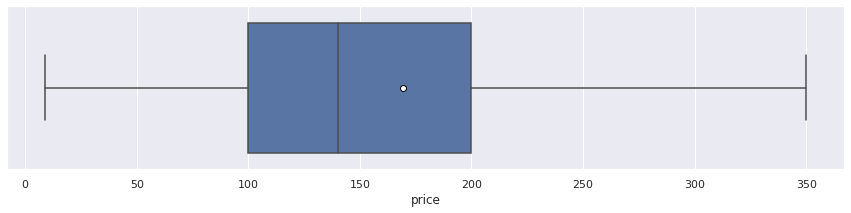

In [17]:
sns.boxplot(
    listings['price'],
    showfliers=False,
    showmeans=True,
    meanprops={
        "marker":"o",
        "markerfacecolor":"white", 
        "markeredgecolor":"black",
        "markersize":"6"
    }
)

In [18]:
_min = listings['price'].min()
q1 = listings['price'].quantile(0.25)
median = listings['price'].quantile(0.5)
q3 = listings['price'].quantile(0.75)
_max = listings['price'].max()

print(f"Minimum: {_min}")
print(f"Quartile 1: {q1}")
print(f"Quartile 2/Median: {median}")
print(f"Quartile 3: {q3}")
print(f"Maximum: {_max}")
print(f"Interquartile Range: {q3 - q1}")

Minimum: 9.0
Quartile 1: 100.0
Quartile 2/Median: 140.0
Quartile 3: 200.0
Maximum: 6477.0
Interquartile Range: 100.0


Now we have a realistic minimum of 9 (Euros). My guess for the 0 Euro price is that these rooms were from Hotels (as one can guess from the feature room_type) or the name of the listing. They probably wanted to promote the hotel rooms somehow and did not set a price for the listing to lure the user onto their website instead of booking the room via AirBnb. As also already described, the data in some of these listings is pretty sparse!

#### Distribution and Summary Statistics of price feature

In [19]:
# figure setup for following figures
sns.set(rc={'figure.figsize':standard_fig_size})

Now a look into the distribution of the price feature.

In [20]:
# helper
prices = listings.copy()['price']

Calculating Skewness, the measure of asymmetry (skew) of a normal or probability distribution, and Kurtosis, the shape, height and steepness of a normal or probability distribution.

In [21]:
print(f"Skewness: {prices.skew()}")
print(f"Kurtosis: {prices.kurtosis()}")

Skewness: 22.11819735315031
Kurtosis: 816.7769977189903


From the skewness value of $22.12$ we can see that the data is skewed (really really) heavily to the left and from the kurotisis value of $816.78$ one can conclude that the 
peak is very high and steep. Following these observations one can also conclude that the data is most likely (kind of) skewed normally distributed.

Plotting the probability distribution of the *price*.

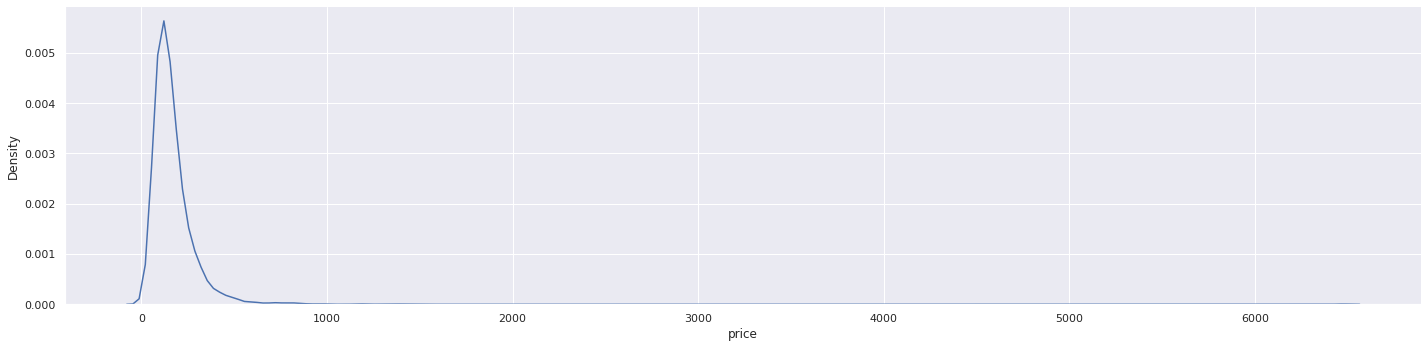

In [22]:
sns.displot(
    prices, 
    kind='kde',     
    height=5,
    aspect=4
)

The fact that the price is a (kinda wobbly) skewed normally distribution is also backed by the plot of the data.

Calculating the mean, variance, median and mode so we can see how the data is effected, rather poluted, by outliers.

In [23]:
print(f"Mean: {prices.mean()}")
print(f"Variance: {prices.var()}")
print(f"Median: {prices.median()}")
print(f"Mode: {prices.mode()[0]} (Value), {len(prices[prices == prices.mode()[0]])} /  {len(prices[prices == prices.mode()[0]])/prices.count()*100:.2f}% (Occurences)")

Mean: 169.22205746061167
Variance: 26846.766031731964
Median: 140.0
Mode: 150.0 (Value), 225 /  4.17% (Occurences)


Looking at the mean one can see a pretty representative value, altough it is biased by the rather big values (what one can kind of confirm by the noticeably smaller median). The variance suffers a little bit more from this, which also leads to the quick assumption that the data is pretty wide spread, but it is not what we can 
see from the distribution plot above, where the density peaks around the mean/median and therefore very low in the spectrum, which leads us to the conclusion that 
the data is indeed not very wide spread, despite the variance suggesting so, but rather concentrated at around 50 to 300. Looking at the mode we see that we have a value of $150$ and an occurence count of $225$ / $4.17\%$ which is rather a lot if one considers the price as an arbitrarly chooseable number in $5395$ data entries.

[]

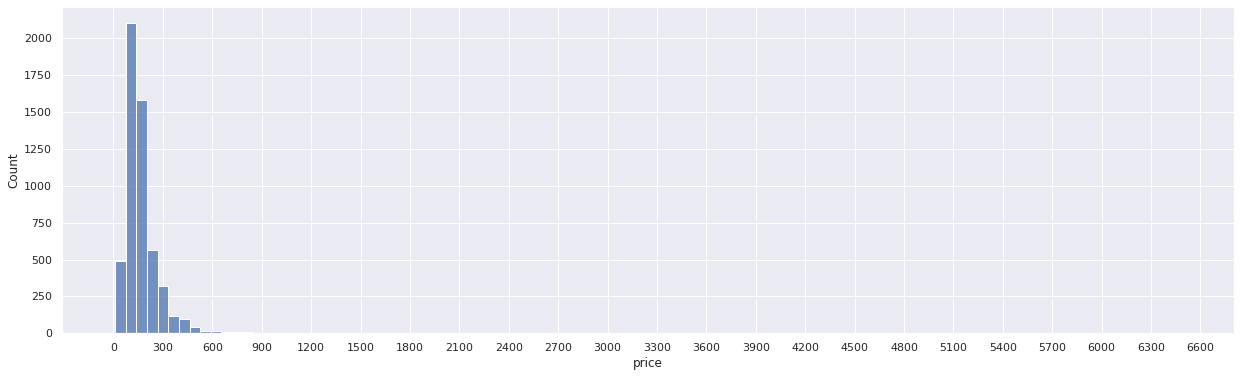

In [24]:
graph = sns.histplot(prices, bins=100)
_ = graph.set_xticks([300*i for i in range(100)])
graph.plot()

This plot confirms the belief that the data is in fact mostly centered around 50 to 300.

#### Distribution and Summary Statistics of price feature w/o outliers

Now a look into the distribution of the price feature but only considering prices < 1000 to account for the majority, the really big, of outlier.

In [25]:
prices = listings.copy()[listings['price'] < 1000]['price']

Again some summary statistics.

In [26]:
print(f"Mean: {prices.mean()}")
print(f"Variance: {prices.var()}")
print(f"Median: {prices.median()}")
print(f"Mode: {prices.mode()[0]} (Value), {len(prices[prices == prices.mode()[0]])} / {len(prices[prices == prices.mode()[0]])/prices.count()*100:.2f}% (Occurences)")

Mean: 165.6497122702803
Variance: 10728.90976736985
Median: 140.0
Mode: 150.0 (Value), 225 / 4.18% (Occurences)


The mean still is far away from the median, which tells us that there are still (much bigger) outliers left in the data, this spread is also backed by the still high variance (altough it dropped by half). Obviously the data is still concentrated around 50 to 300. Median and Mode stayed unchanged.

<AxesSubplot:xlabel='price'>

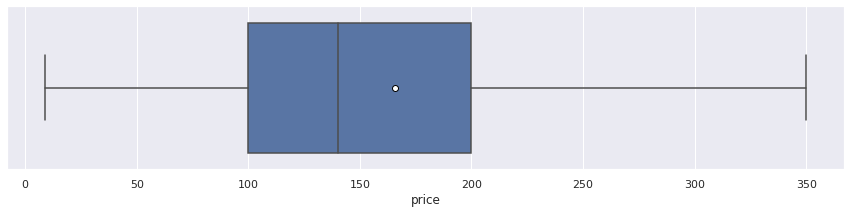

In [27]:
fig, ax = plt.subplots(figsize=boxplot_fig_size)

sns.boxplot(
    prices,
    showfliers=False,
    showmeans=True,
    meanprops={
        "marker":"o",
        "markerfacecolor":"white", 
        "markeredgecolor":"black",
        "markersize":"6"
    }
)

The boxplot visually confirmes that the mean is still pulled to the right, but not as heavy as before.

Calculating Skewness and Kurtosis for Distribution.

In [28]:
print(f"Skewness: {prices.skew()}")
print(f"Kurtosis: {prices.kurtosis()}")

Skewness: 2.5069575758616547
Kurtosis: 10.222914563863492


One observes that all of a sudden the skewness and kurtosis drop significantly to a skewness value of $2.51$ and a kurtosis value of $10.22$. The data is still highly skewed to the right (value above +1) and the peak (kurtosis) is still high and steep, but both values are nearly not as extreme as before. Still one can conclude that the data is kinda skewed normally distributed, but now much nicer for sure.

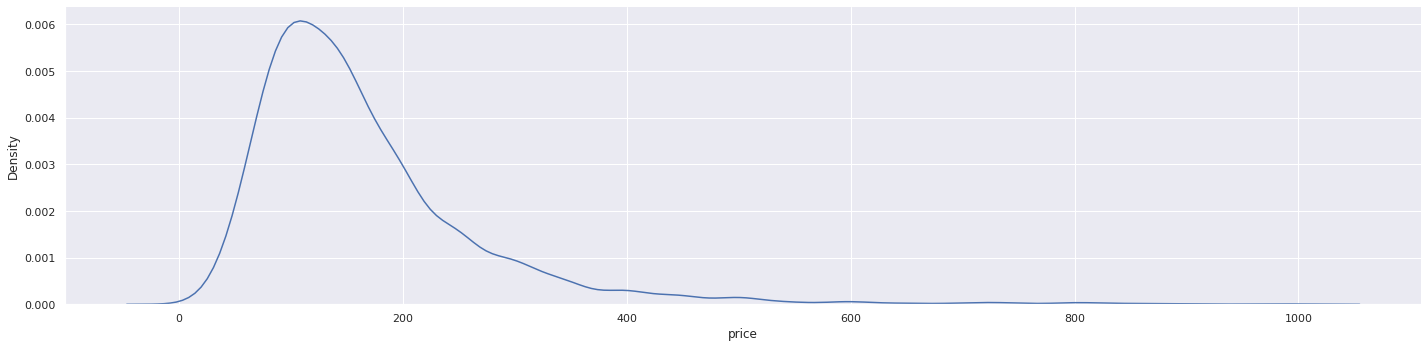

In [29]:
sns.displot(
    prices, 
    kind='kde',     
    height=5,
    aspect=4
)

The distribution plot still shows that the *price* is a (much cleaner and not that extremely) skewed (kinda wobbly) normal distribution.

Calculating the mean, variance and median of the cleansed prices.

[]

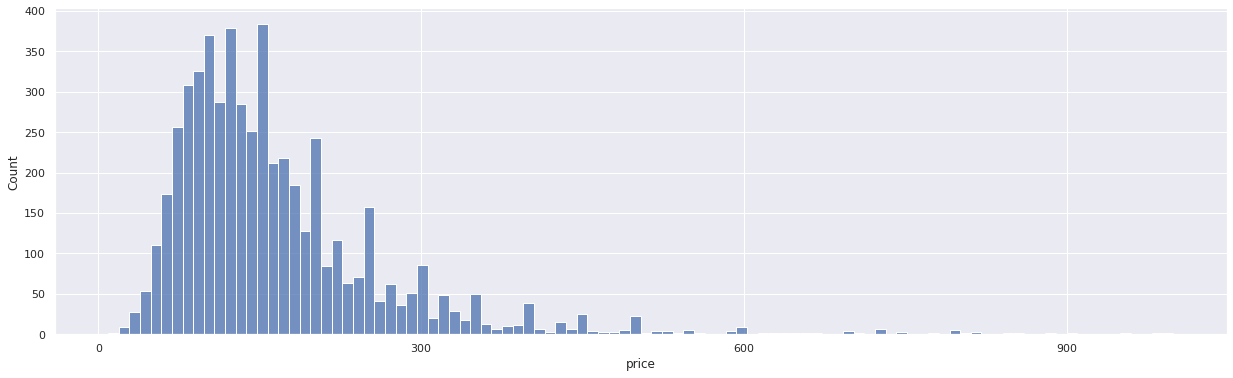

In [30]:
graph = sns.histplot(prices, bins=100)
_ = graph.set_xticks([300*i for i in range(100)])
graph.plot()

This plot confirms the belief that the data is in fact mostly centered around 50 to 300.

#### Interactive Distribution and Boxplot of price feature (upper bound and boxplot outliers)

Here we can play around with the upper bound of the price feature to plot a distribution plot and some summary statistics.

In [31]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import IntSlider

@interact(
    cutoff=IntSlider(
        min=0, 
        max=listings['price'].max() + 10, 
        step=10,
        description="Price upper bound: ",
        continous_update=True
    ),
    outliers=widgets.Checkbox(
        value=True,
        description='Show outliers in Boxplot',
        disabled=False,
        indent=False
    )
)
def _(cutoff, outliers):
    prices = listings[listings['price'] < cutoff]['price']
        
    if prices.count() != 0:
        occurences = prices[prices == prices.mode()[0]].count()
        mode = prices.mode()[0]
    else:
        occurences = 'nan'
        mode = 'nan'
    
    print('-----------------------')
    print(f"| Mean: {prices.mean():.3f}")
    print(f"| Variance: {prices.var():.3f}")
    print(f"| Median: {prices.median():.3f}")
    print(f"| Mode: {mode} (Value), {occurences} (Occurences)")    
    print('-----------------------')
    print(f"| Skewness: {prices.skew():.3f}")
    print(f"| Kurtosis: {prices.kurtosis():.3f}")
    print('-----------------------')
    
    sns.displot(
        prices, 
        kind='kde',     
        height=5,
        aspect=4
    )
    plt.show()
    
    sns.boxplot(
        prices,
        showfliers=outliers,
        showmeans=True,
        meanprops={
        "marker":"o",
        "markerfacecolor":"white", 
        "markeredgecolor":"black",
        "markersize":"6"
        }
    )
    plt.show()

interactive(children=(IntSlider(value=0, description='Price upper bound: ', max=6487, step=10), Checkbox(value…

### Bathrooms/Bedrooms/Beds Features

All three of these features (bathrooms, bedrooms, beds) are basically Categorical/Discrete features.

In [32]:
# figure setup for following figures
sns.set(rc={'figure.figsize':countplot_fig_size})

The following are some helper functions to make everything nicer.

In [33]:
"""
    Plotting a countplot for given feature. 
      - Ascending has to be set to False in case of a string feature
"""
def countplot(keyword: str, ascending=True):

    graph = sns.countplot(
        x=keyword,
        data=listings
    )

    counts = listings[keyword].value_counts().sort_index(ascending=ascending).to_numpy()
    
    for i, p in enumerate(graph.patches):
        height = p.get_height()
        graph.text(p.get_x() + p.get_width() / 2., height + 0.1, f"{(counts[i]/listings[keyword].count())*100:.1f}%", ha="center")
        
"""
    Plotting a countplot for given (multiple) features in one plot. 
"""
def countplot_multiple(keywords: [str], ascending=True):
    graph = sns.countplot(
        x='value',
        hue='variable',
        data=pd.melt(listings[keywords])
    )
    graph.legend(loc='upper right')

Next are some countplots inorder to get a grip of the distribution of the categorical/discrete features of bathrooms, bedrooms and beds using the occurence counts of the individual categorical/discrete values.

Due to the fact that bed and bedrooms share the same scale one can draw them togehter in a single countplot.

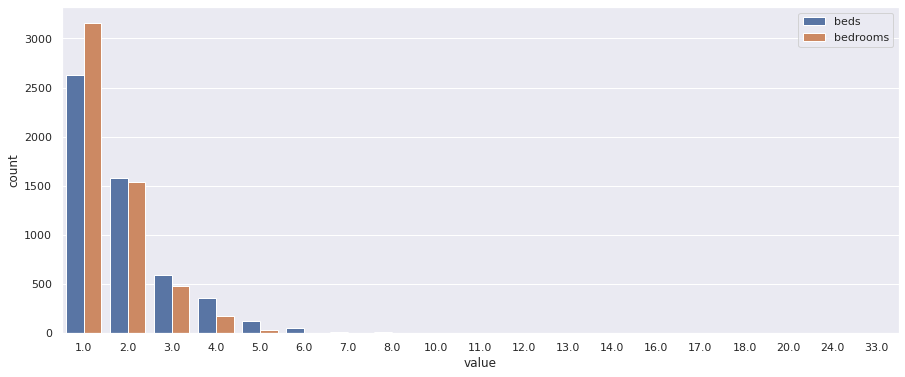

In [34]:
countplot_multiple(['beds', 'bedrooms'])

This plot does not hold that much statistical information, rather information about their correlation. To briefly sum it up: They (obviously) correlate with each other, altough there are a lot more single bedroom apartments then apartmnts with a single bed, i'll leave it at that, the point of this section is not to find correlations, thus the next plots are also countplots with a percentage.

#### Countplot of *bathrooms*.

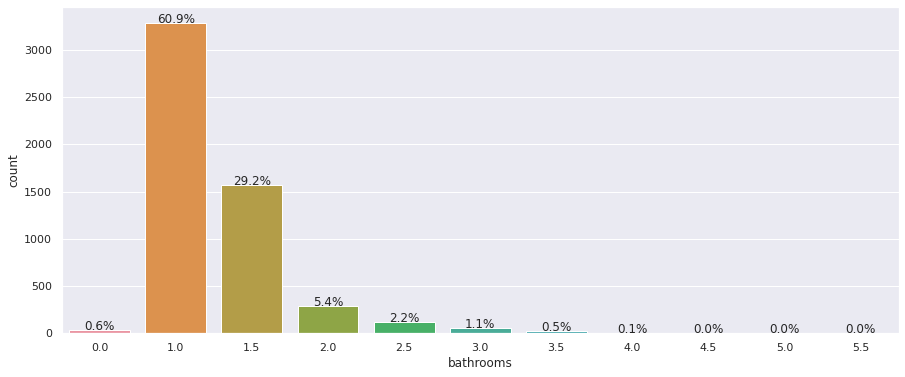

In [35]:
countplot('bathrooms')

It was kinda predictable that the most listings ($60.9\%$) would be single bedrooms, because even in a three bedroom apartment it is ethically reasonable to have a single bathroom. What is interesting is that $0.6\%$ of the listings have 0 bathrooms, this could be just 0 values, so the host didn't bother with putting the info in or there is some kind of shared bathroom stuff going on, which is rather unlikely. Besides that the amount of listings (except for 0 bathrooms) drops off exponentially with encreasing steps/bathrooms.

#### Countplot of *beds*.

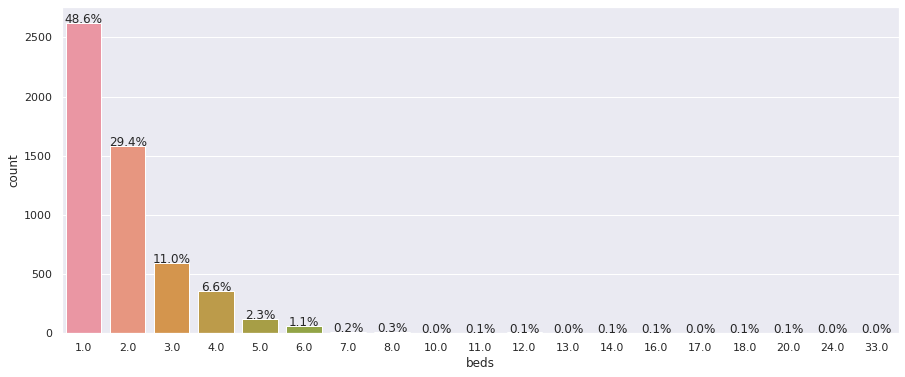

In [36]:
countplot('beds')

Again nearly about half ($48.6\%$) of the listings are single bed apartments, after that again the count/percentage is dropping off exponentially. Remark: there are apartemnts with e.g 24 or 33 beds, but due to rounding and displaying the plot nicely the percentage is $0.0\%$ and obviously the bar is not visible.

#### Countplot of *beds*.

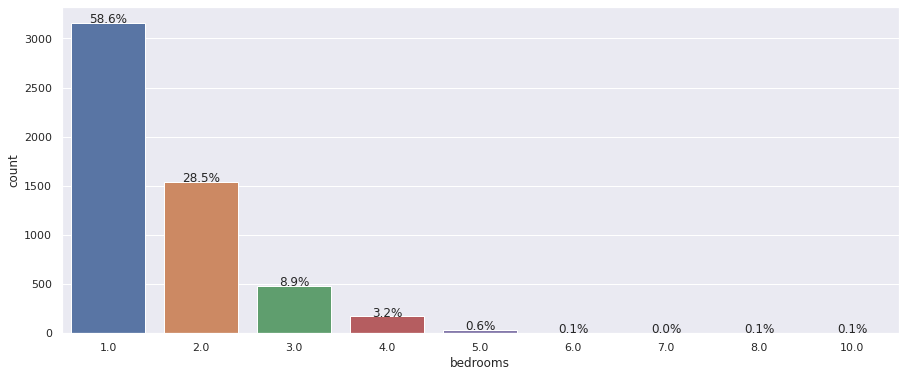

In [37]:
countplot('bedrooms')

More than half ($58.6$%) of the listings are single bedroom apartments, after that again the count/percentage is dropping off exponentially. Remark: there are apartemnts with e.g 7 bedrooms, but due to rounding and displaying the plot nicely the percentage is $0.0$% and obviously the bar is not visible.

### Response Times Feature

Short look at the categroical feature of response times.

From the heatmap seen in section one, one can observe that here one finds a lot of missing values, just as a remark.

In [38]:
# figure setup for following figures
sns.set(rc={'figure.figsize':countplot_fig_size})

Again a countplot is the plot to go for categorical features like *host_response_time*.

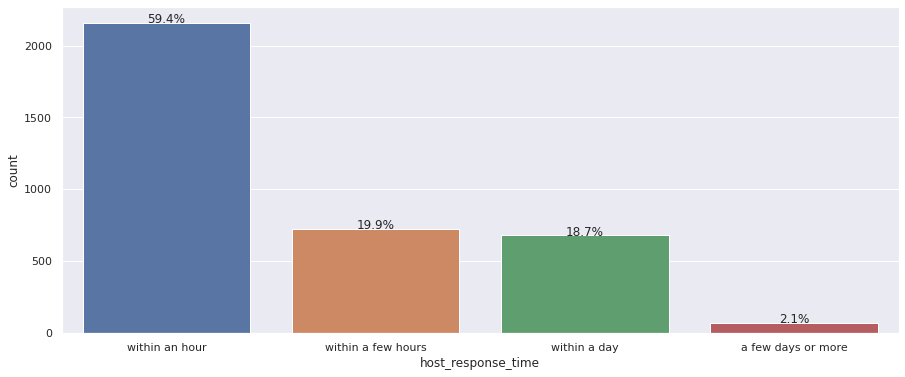

In [39]:
countplot('host_response_time', ascending=False)

One can see that in $59.4\%$ of the time the host resonds "within an hour", "responding within a few hours" and "within a day" are with $19.9\%$ and $18.7\%$ respectively pretty close, this might be due to the classification process e.g. the mean of response times falls into the category "within a few hours" between 2 and 5 hours as *host_response_time*. Further the subjective time difference between immediately and 1 hour is not that much less then e.g. between 2 hours annd 5 hours, in the latter the time streches much longer from an absolute point of view, but in a subjective one this could be, at least for some, not the case.

### Reviews Features

All the features this is referring to are continous features.

These Features all analyzed in this section span:
* review_scores_rating
* review_scores_accuracy
* review_scores_cleanliness
* review_scores_checkin
* review_scores_communication
* review_scores_location
* review_scores_value

Here again one can observe a lot of missing values seen in the boxplot in section 1.

In [40]:
# figure setup for following figures
sns.set(rc={'figure.figsize':standard_fig_size})

Helper function and helper variable to make everything nicer and easier.

In [41]:
# a variable for convenience
rating_features = [
    'review_scores_rating', 
    'review_scores_accuracy', 
    'review_scores_cleanliness', 
    'review_scores_checkin', 
    'review_scores_communication', 
    'review_scores_location', 
    'review_scores_value'
]

"""
    Plotting a boxplot for given (multiple) features in one plot. 
"""
def boxplot_multiple(keywords: [str], outliers=True):
    graph = sns.boxplot(
        y='value',
        x='variable',
        data=pd.melt(listings[keywords]),
        showfliers=outliers,
        showmeans=True,
        meanprops={
            "marker":"o",
            "markerfacecolor":"white", 
            "markeredgecolor":"black",
            "markersize":"6"
        }
    )

First looking at the continous data as a boxplot, again here with the mean as a white dot.

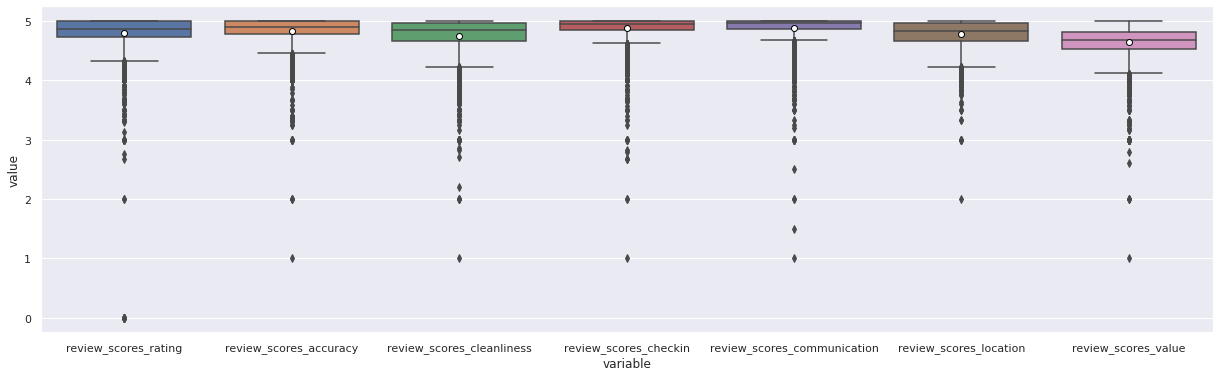

In [42]:
boxplot_multiple(rating_features)

One can only observe that all the different review features are concentrated in the top values (4 to 5), looking at the boxplots without outliers one might get a better look.

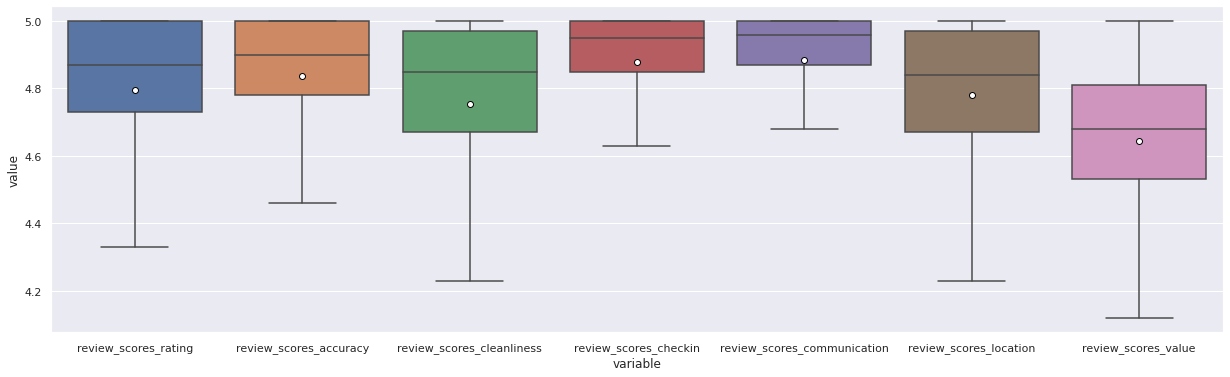

In [43]:
boxplot_multiple(rating_features, outliers=False)

Here one can see clearly now that the outliers pull the mean below the median, some stronger then others, for example the mean of *review_scores_value* is further at the median as for *review_scores_cleanliness*, 4 out of the 7 have their maximum value as quartile1, 2 of theses 4 have a very high median, but a mean close to quartile2 and therefore the data is concentrated at the very very top. The boxplots for *review_scores_cleanliness* and *review_scores_location* here look pretty equal except for the mean, which is higher in the *review_scores_location*, which is due to the outliers one can observe in the plot above. The only boxplot beeing different then all the others is the one for *review_scores_value* with generally way lower values.

Calculating the skewness and kurtosis of the features, maybe the data is somehow normally distributed data.

In [44]:
for rf in rating_features:
    print(f"{rf}:")
    print(f"    Skewness: {listings[rf].skew()}")
    print(f"    Kurtosis: {listings[rf].kurtosis()}")
    print(f"    Mean: {listings[rf].mean()}")
    print(f"    Variance: {listings[rf].var()}")
    print(f"    Median: {listings[rf].median()}")
    print(f"    Mode: {listings[rf].mode()[0]} (Value), {len(listings[listings[rf] == listings[rf].mode()[0]])} / {len(listings[listings[rf] == listings[rf].mode()[0]])/listings[rf].count()*100:.2f}% (Occurences)")
    print()

review_scores_rating:
    Skewness: -7.654542987675809
    Kurtosis: 94.32220773423532
    Mean: 4.793984992902048
    Variance: 0.11372008009928493
    Median: 4.87
    Mode: 5.0 (Value), 1254 / 25.43% (Occurences)

review_scores_accuracy:
    Skewness: -4.514907584512385
    Kurtosis: 38.09214152382168
    Mean: 4.837973577235773
    Variance: 0.056222097289091416
    Median: 4.9
    Mode: 5.0 (Value), 1386 / 28.17% (Occurences)

review_scores_cleanliness:
    Skewness: -2.9517704398764764
    Kurtosis: 15.586312617733448
    Mean: 4.754432926829268
    Variance: 0.09713108718557707
    Median: 4.85
    Mode: 5.0 (Value), 1117 / 22.70% (Occurences)

review_scores_checkin:
    Skewness: -5.567780072654971
    Kurtosis: 52.975528108514226
    Mean: 4.878662601626016
    Variance: 0.048626468777942515
    Median: 4.95
    Mode: 5.0 (Value), 1740 / 35.37% (Occurences)

review_scores_communication:
    Skewness: -5.704993366735886
    Kurtosis: 56.083778758355955
    Mean: 4.8858373983739

These summary statistics, skew and kurtosis do not let one observe something out of the ordinary. The review features generally have a rather low variance, meaning that the data is closely distributed around the mean. The review features also have a general negative skewness to variying degrees, meaning all the feature's distributions are skewed to the right, altough the kurtosis varies more then the skewness, meaning some distributions are lower and flatter then others. Altough what is interesting is that the mode is a very common (in terms of amount) value and the maximum value, for example the mode of $5.0$ is $40.39\%$ of the values for *review_scores_communication*.

#### Distribution Plot of all the review features.

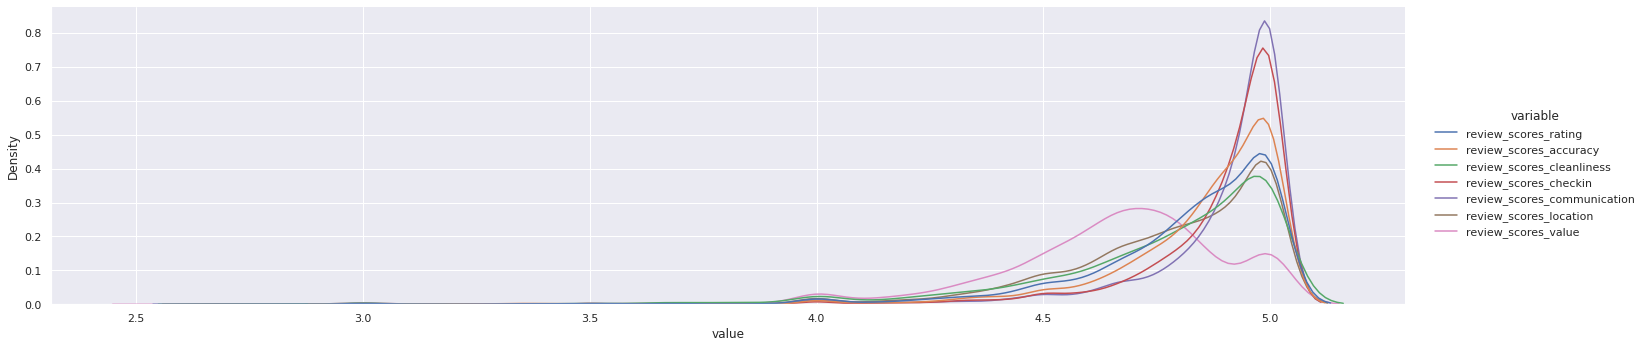

In [45]:
sns.displot(
    x='value',
    hue='variable',
    data=pd.melt(listings[listings[rating_features] > 2.5][rating_features]),
    kind='kde',
    height=5,
    aspect=4
)

One can again see what was prophesied by the skewness and kurtosis. The Distributions commly look very woobly with a small hill at $4.0$. The one that already stood out in the boxplots, *review_scores_value*, has a stranger distribution then the rest with its peak at around $4.7$ and a small hill at $5.0$. Looking at *review_scores_checkin* one can see that it is way less wobbly then the rest and peaking second highest at nearly $5.0$. The feature *review_scores_communication* peaks highest, also its boxplot looked pretty one sided.